# 군집분석

## 문제.	A(0,0), B(10,10), C(11,10), D(2,2), E(9,13)의 점을 바탕으로 비슷한 점끼리 묶어 보아라.

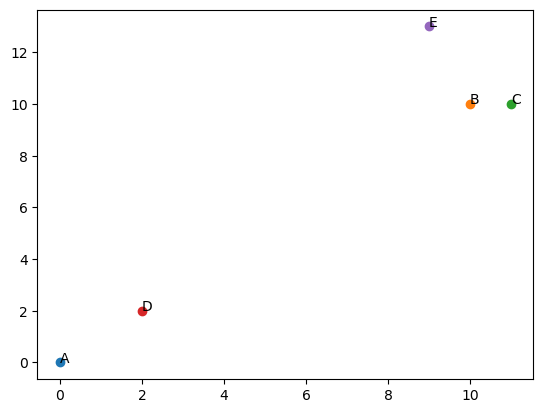

In [2]:
import matplotlib.pyplot as plt

# 점의 좌표를 사전형으로 정의
points = {'A': (0, 0), 'B': (10, 10), 'C': (11, 10), 'D': (2, 2), 'E': (9, 13)}

# *coords: coords의 모든 값을 의미함
# points.items()라고 하면 사전의 이름과 내용을 가져옴
for name, coords in points.items():
    plt.scatter(*coords, label=name)  # 좌표에 점을 표시
    plt.text(coords[0], coords[1], name)  # 좌표에 이름을 표시

# 그래프 출력
plt.show()

In [3]:
from scipy.spatial import distance_matrix
import pandas as pd

# 좌표를 리스트로 변환
coords_list = list(points.values())

# p는 Minkowski p-norm
# p=2: 유클리디안 거리 행렬 계산 (디폴트값)
dist_matrix=distance_matrix(coords_list, coords_list,p=2)

# 결과를 DataFrame으로 변환하여 출력
df_dist_matrix = pd.DataFrame(dist_matrix,
                              index=points.keys(),
                              columns=points.keys())
df_dist_matrix

,A,B,C,D,E
A,0.000000,14.142136,14.866069,2.828427,15.811388
B,14.142136,0.000000,1.000000,11.313708,3.162278
C,14.866069,1.000000,0.000000,12.041595,3.605551
D,2.828427,11.313708,12.041595,0.000000,13.038405
E,15.811388,3.162278,3.605551,13.038405,0.000000


In [4]:
# A와 E의 유클리디안 거리
import numpy as np

np.sqrt((0-9)**2+(0-13)**2)

15.811388300841896

In [5]:
# B1=(B,C)과 각 점들과의 최소값 계산
from scipy.spatial.distance import minkowski

B1={'B': (10, 10), 'C': (11, 10)}
pts = {'A': (0, 0), 'D': (2, 2), 'E': (9, 13)}

res={} # 빈 사전형 자료
for name,coords in pts.items():
    tag=name+'&B1' # 사전에 들어갈 이름
    d=[] # 빈 리스트
    for j in B1.values():
        d.append(minkowski(coords,j,p=2))
    res[tag]=np.min(d) # 최소값을 value로 추가
res # 결과 출력

{'A&B1': 14.142135623730951,
 'D&B1': 11.313708498984761,
 'E&B1': 3.1622776601683795}

In [6]:
# 군집간 개별 거리를 계산하는 cdist
from scipy.spatial.distance import cdist
B1={'B': (10, 10), 'C': (11, 10)}
pts = {'A': (0, 0), 'D': (2, 2), 'E': (9, 13)}

# B1 군집과 pts 군집간의 유클리디안 거리 계산
# metric 매개변수 추가 가능(디폴트 값 = 'euclidean')
linkage=cdist(list(B1.values()), list(pts.values()))

np.min(linkage,axis=0) # 세로 방향의 최소값 계산

array([14.14213562, 11.3137085 ,  3.16227766])

In [7]:
# pts 내 점들끼리의 거리 계산

pts = {'A': (0, 0), 'D': (2, 2), 'E': (9, 13)}

coords_list = list(pts.values())
dist_matrix=distance_matrix(coords_list, coords_list,p=2)

# 결과를 DataFrame으로 변환하여 출력
df_dist_matrix = pd.DataFrame(dist_matrix,
                              index=pts.keys(),
                              columns=pts.keys())
df_dist_matrix

,A,D,E
A,0.000000,2.828427,15.811388
D,2.828427,0.000000,13.038405
E,15.811388,13.038405,0.000000


In [8]:
# B1을 추가하여 행렬로 표시
df=df_dist_matrix
B1_dist=[14.14213562, 11.3137085 ,  3.16227766]
df['B1'] = B1_dist # 'B1'이라는 칼럼 추가
df=df.reindex(sorted(df.columns),axis=1) #칼럼 이름으로 소팅
#'B1'이라는 이름의 인덱스 행 추가
df.loc['B1']=[14.14213562, 0, 11.3137085 ,  3.16227766]
df.sort_index() # 인덱스이름으로 소팅

,A,B1,D,E
A,0.000000,14.142136,2.828427,15.811388
B1,14.142136,0.000000,11.313709,3.162278
D,2.828427,11.313709,0.000000,13.038405
E,15.811388,3.162278,13.038405,0.000000


In [12]:
# 군집분석 함수 작성


# 두 점간의 거리 구하는 함수
def distance(A,B):
    import numpy
    return np.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)

def min_distance(points):
    import numpy as np

    # points에서 최소값을 만들어주는 두 점의 key값을 만들어줌
    # points는 사전형 데이터
    # 최소값을 갖는 포인트들의 이름을 찾기 위해 인덱스와 포인트 딕셔너리를 매핑
    index_to_point = {i: point for i, point in enumerate(points.keys())}
    N = len(points)  # 좌표 수

    # 점들 간의 거리 계산하기
    # 각 점들 간의 거리를 담을 배열 초기화
    distances = []

    # 각 점들 간의 거리 계산
    for c1 in points.values():
        for c2 in points.values():
            distances.append(distance(c1, c2))

    # 거리 행렬 출력
    distances = np.array(distances)  # numpy array로 변환
    D = distances.reshape(N, N)  # 행렬 모양으로 변경

    # 0을 포함하지 않는 최소값 찾기
    masked_D = np.ma.masked_equal(D, 0)  # 0을 마스킹하여 제거
    min_val = masked_D.min()  # 0을 제외한 최소값 찾기

    # 최소값을 갖는 행과 열의 인덱스 추출
    min_indices = np.where(D == min_val)  

    # 첫 번째 최소값 위치의 인덱스를 반환
    return index_to_point[min_indices[0][0]], index_to_point[min_indices[1][0]]

# 최소 거리의 두 점의 key값을 출력해 주는 함수
def clustering_fn(points, N_cluster):
    import pandas as pd
    import numpy as np
    # points: 분석할 좌표들 (사전형으로 입력할 것)
    # N_cluster: 분류 집단 수

    if N_cluster > len(points):
        return print('군집의 개수는 분석 좌표 수보다 작아야 합니다.')
    elif N_cluster == len(points):  # 군집수 = 입력 좌표수
        return points.keys()

    while len(points) > N_cluster:
        out = min_distance(points)  # 최소거리에 두 점의 key값 출력
        newkey = out[0] + out[1]  # key값을 합쳐서 새로운 key 생성
        # centroid 방식에 의해 새로운 점 만들기
        newvalue = tuple(np.mean([points[out[0]], points[out[1]]], axis=0))
        del points[out[0]], points[out[1]]  # 두 점을 제거
        points[newkey] = newvalue  # 새로운 점 추가

    return points.keys()

clustering_fn(points,2)

dict_keys(['AD', 'EBC'])

In [15]:
# 점의 좌표를 사전형으로 정의
points = {'A': (0, 0), 'B': (10, 10), 'C': (11, 10), 'D': (2, 2), 'E': (9, 13)}
clustering_fn(points,3)

dict_keys(['E', 'BC', 'AD'])

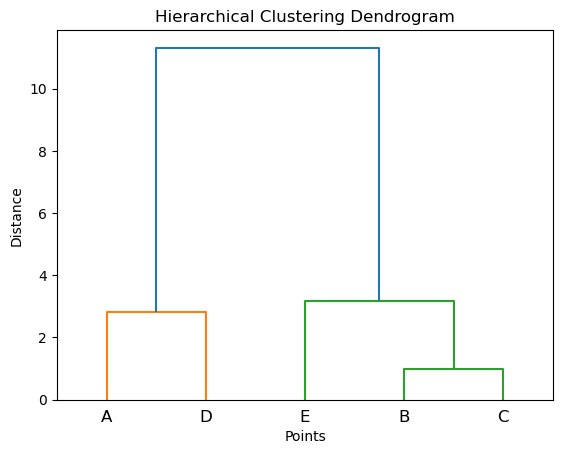

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
# 점의 좌표
points = {'A': (0, 0), 'B': (10, 10), 'C': (11, 10), 'D': (2, 2), 'E': (9, 13)}
df = pd.DataFrame(data=points)
df = df.T

# linkage 함수를 사용하여 계층적 군집화
linkage_result = linkage(df.values, method='single', metric='euclidean')

# 덴드로그램 그리기
dendrogram(linkage_result, labels=list(points.keys()))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

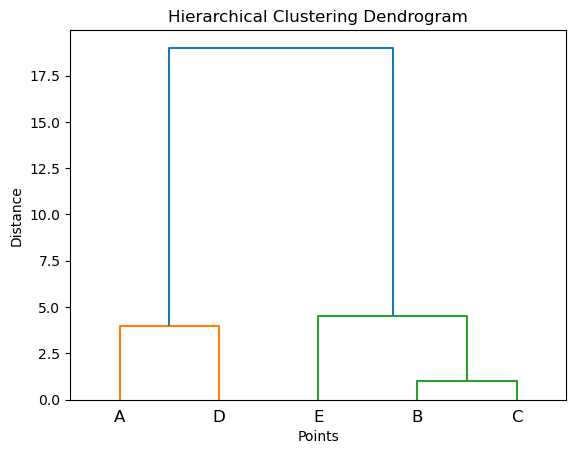

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
# 점의 좌표
points = {'A': (0, 0), 'B': (10, 10), 'C': (11, 10), 'D': (2, 2), 'E': (9, 13)}
df = pd.DataFrame(data=points)
df = df.T

# linkage 함수를 사용하여 계층적 군집화
linkage_result = linkage(df.values, method='average', metric='cityblock')

# 덴드로그램 그리기
dendrogram(linkage_result, labels=list(points.keys()))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

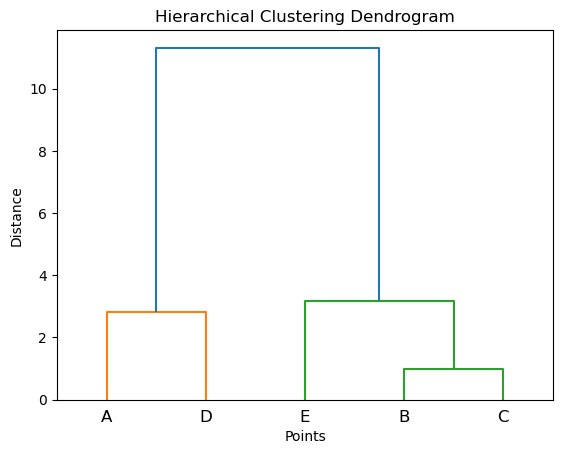

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# 점의 좌표
points = {'A': (0, 0), 'B': (10, 10), 'C': (11, 10), 'D': (2, 2), 'E': (9, 13)}

# 좌표 리스트 생성
coords_list = list(points.values())

# 거리 행렬 계산
dist_matrix = pdist(coords_list)

# linkage 함수를 사용하여 계층적 군집화
linkage_matrix = linkage(dist_matrix, method='single')

# 덴드로그램 그리기
dendrogram(linkage_matrix, labels=list(points.keys()))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

## K-means 군집분석

In [27]:
from scipy.spatial.distance import cdist

# 점의 좌표
points = {'A': (0, 0), 'B': (10, 10), 'C': (11, 10), 'D': (2, 2), 'E': (9, 13)}
cs={'C1':(0,1),'C2':(2,0)}

# points와 cs 점들과의 유클리디안 거리 계산
linkage=cdist(list(points.values()), list(cs.values()))

# 데이터프레임으로 전환
df = pd.DataFrame(data=linkage,columns=cs.keys(),index=points.keys())
df

,C1,C2
A,1.000000,2.000000
B,13.453624,12.806248
C,14.212670,13.453624
D,2.236068,2.000000
E,15.000000,14.764823


In [28]:
# C1<C2보다 작은지 판단
df['판단']=df.C1<df.C2
df

,C1,C2,판단
A,1.000000,2.000000,True
B,13.453624,12.806248,False
C,14.212670,13.453624,False
D,2.236068,2.000000,False
E,15.000000,14.764823,False


In [22]:
# 중심값(centroid) 계산
df_points=pd.DataFrame(data=points)
df_points=df_points.T # 행과 열을 뒤바꿈
df_points.columns=['x','y'] # 칼럼이름 갱신
# df['판단'] 칼럼의 False인 index 행들만의 평균계산
df_points.loc[df[~df.판단].index].mean()

x    8.00
y    8.75
dtype: float64

In [25]:
df_points

,x,y
A,0,0
B,10,10
C,11,10
D,2,2
E,9,13


In [29]:
# numpy array로 변환
C1=tuple(df_points.loc[df[df.판단].index].mean()) # True 점들
C2=tuple(df_points.loc[df[~df.판단].index].mean()) # False 점들
cs={'C1':C1,'C2':C2}
cs

{'C1': (0.0, 0.0), 'C2': (8.0, 8.75)}

In [30]:
# points와 cs 점들과의 유클리디안 거리 계산
linkage=cdist(list(points.values()), list(cs.values()))

# 데이터프레임으로 전환
df = pd.DataFrame(data=linkage,columns=cs.keys(),index=points.keys())
df['판단']=df.C1<df.C2
df

,C1,C2,판단
A,0.000000,11.855906,True
B,14.142136,2.358495,False
C,14.866069,3.250000,False
D,2.828427,9.031196,True
E,15.811388,4.366062,False


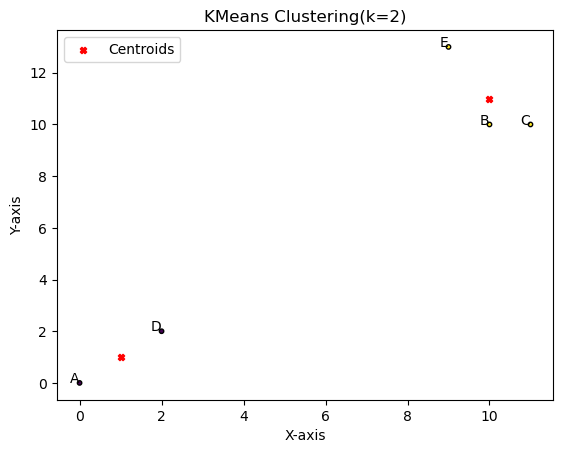

In [31]:
import numpy as np
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

# 주어진 좌표 데이터
points = {'A': (0, 0), 'B': (10, 10), 'C': (11, 10), 'D': (2, 2), 'E': (9, 13)}

# 좌표 데이터를 NumPy 배열로 변환 (dtype=float)
X = np.array(list(points.values()), dtype=float)

# 적절한 K 값 선택 (예: K=2)
k = 2

# KMeans 군집분석 수행
# vq함수는 군집의 인덱스를 반환해줌
centroids, _ = kmeans(X, k) # centroids에는 군집의 중심점들이 저장됨
labels, _ = vq(X, centroids) # label에는 각 포인터가 속한 군집번호가 있음

# 군집화 결과를 시각화
# c=labels : labels 숫자에 따라 다른 색깔로 표시
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=20, c='red', label='Centroids')

# 각 점에 텍스트 추가
# zip()은 각 객체로 부터 하나씩 가져와 묶어주는 역할을 함
for label, (x, y) in zip(points.keys(), X):
    # ha: horizaontal alignment로 텍스트의 수평정렬(left,right,center)
    plt.text(x, y, label, fontsize=10, ha='right')

plt.title('KMeans Clustering(k=2)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [ ]:
labels

array([0, 1, 1, 0, 1])

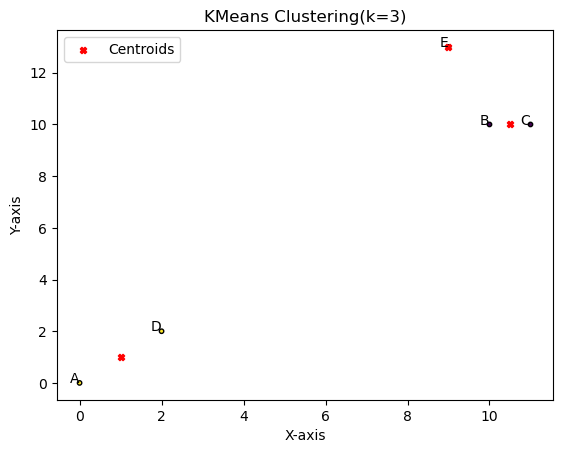

In [32]:
# 3개의 군집으로 나눌 때
k = 3

# KMeans 군집분석 수행
centroids, _ = kmeans(X, k)
labels, _ = vq(X, centroids)

# 군집화 결과를 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=20, c='red', label='Centroids')

# 각 점에 텍스트 추가
for label, (x, y) in zip(points.keys(), X):
    plt.text(x, y, label, fontsize=10, ha='right')

plt.title('KMeans Clustering(k=3)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [33]:
# 3개의 군집으로 나눈 후, 데이터프레임으로 다시 보기
import pandas as pd
df=pd.DataFrame(X,columns=['feature1','feature2'],index=points.keys())
df['Cluster']=labels
df

,feature1,feature2,Cluster
A,0.0,0.0,2
B,10.0,10.0,0
C,11.0,10.0,0
D,2.0,2.0,2
E,9.0,13.0,1


In [34]:
# 클러스터별로 각 feature에 대한 기본 통계량 살펴보기
df.groupby('Cluster').describe()

feature1                                                 feature2  \
           count  mean       std   min    25%   50%    75%   max    count   
Cluster                                                                     
0            2.0  10.5  0.707107  10.0  10.25  10.5  10.75  11.0      2.0   
1            1.0   9.0       NaN   9.0   9.00   9.0   9.00   9.0      1.0   
2            2.0   1.0  1.414214   0.0   0.50   1.0   1.50   2.0      2.0   

                                                       
         mean       std   min   25%   50%   75%   max  
Cluster                                                
0        10.0  0.000000  10.0  10.0  10.0  10.0  10.0  
1        13.0       NaN  13.0  13.0  13.0  13.0  13.0  
2         1.0  1.414214   0.0   0.5   1.0   1.5   2.0

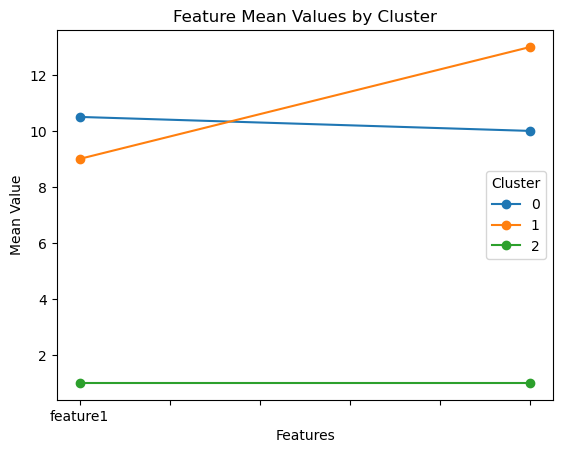

In [35]:
# 각 feature에 대한 군집별 평균값 그래프 그리기
df.groupby('Cluster').mean().T.plot(kind='line', marker='o')

# 그래프에 제목과 라벨 추가
plt.title('Feature Mean Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')

# 그래프 표시
plt.show()

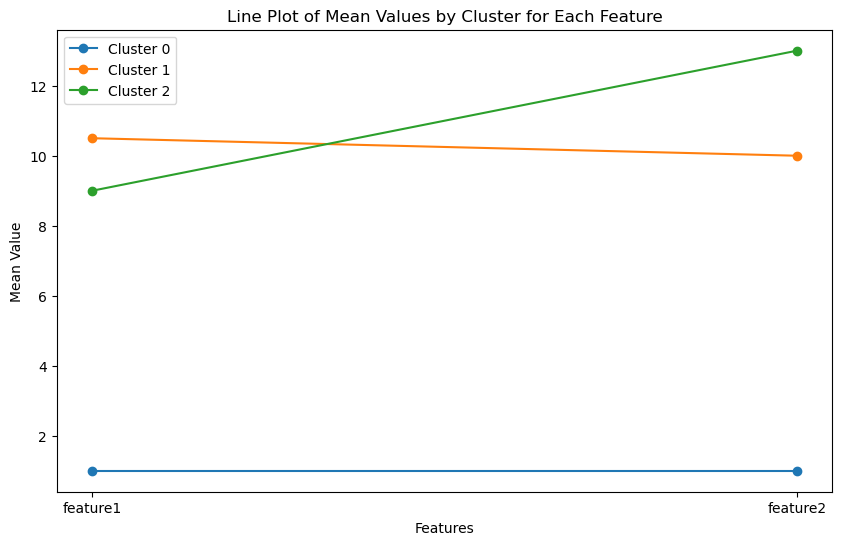

In [ ]:
# 각 feature에 대한 군집별 평균값 그래프 그리기

# 피처 이름 가져오기
column_names = df.columns[:-1].tolist()

fig, ax = plt.subplots(figsize=(10, 6))

# df['Cluster'].unique(): 'Cluster' 열에 있는 unique 값들(0,1,2)
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster].drop('Cluster', axis=1).mean()
    cluster_data.plot(marker='o', label=f'Cluster {cluster}', ax=ax)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(column_names)
ax.set_xlabel('Features')
ax.set_ylabel('Mean Value')
plt.title('Line Plot of Mean Values by Cluster for Each Feature')
plt.legend()
plt.show()

# 붓꽃 데이터 분석

In [36]:
# 붓꽃 데이터 읽어들이기
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

IR=load_iris()
df=pd.DataFrame(data=IR.data,columns=IR.feature_names)

In [37]:
type(IR['data'])

numpy.ndarray

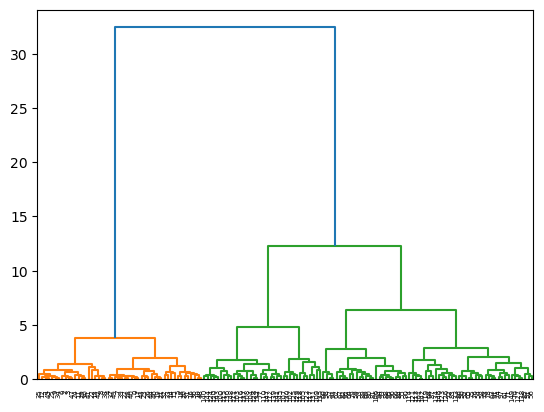

In [38]:
# 덴드로그램 그리기
from scipy.cluster import hierarchy # 계층적 군집분석 도구
import matplotlib.pyplot as plt # 그래프 그리는 도구

# IR.data를 바탕으로 ward 연결방법에 의해 계층적 군집분석 수행
Z=hierarchy.linkage(IR['data'],method='ward')


# 덴드로그램으로 보여주기
plt.figure()
out=hierarchy.dendrogram(Z)

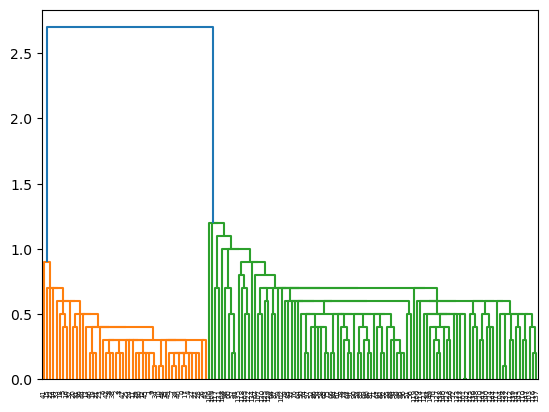

In [39]:
# 데이터 거리 계산: 맨하탄 거리
# 클러스터 거리계산 방법: single linkage
Z=hierarchy.linkage(IR['data'],
                    method='single',
                    metric='cityblock')

# 덴드로그램으로 보여주기
plt.figure()
out=hierarchy.dendrogram(Z)

In [40]:
IR['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


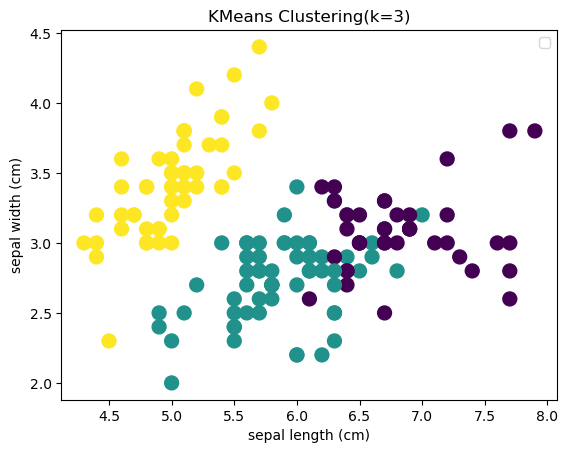

In [41]:
from scipy.cluster.vq import kmeans,vq

k=3 # 군집개수 설정
X=IR['data'] # feature 데이터 선택

# KMeans 군집분석 수행
centroids, _ = kmeans(X, k)
labels, _ = vq(X, centroids)

# 군집화 결과를 시각화, 처음 2개의 feature에 대해서만 그려보기
plt.scatter(X[:, 0], X[:, 1], c=labels,
            cmap='viridis', s=100)
plt.title('KMeans Clustering(k=3)')
plt.xlabel(IR['feature_names'][0])
plt.ylabel(IR['feature_names'][1])
plt.legend()
plt.show()

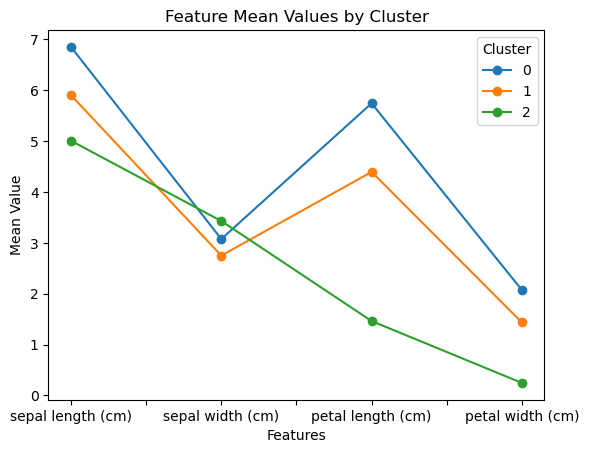

In [42]:
# 각 feature에 대한 군집별 평균값 그래프 그리기
import pandas as pd
df=pd.DataFrame(X,columns=IR.feature_names)
df['Cluster']=labels # 새 칼럼 생성

# 클러스터 별로 평균값 계산하기
df.groupby('Cluster').mean().T.plot(kind='line', marker='o')

# 그래프에 제목과 라벨 추가
plt.title('Feature Mean Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')

# 그래프 표시
plt.show()

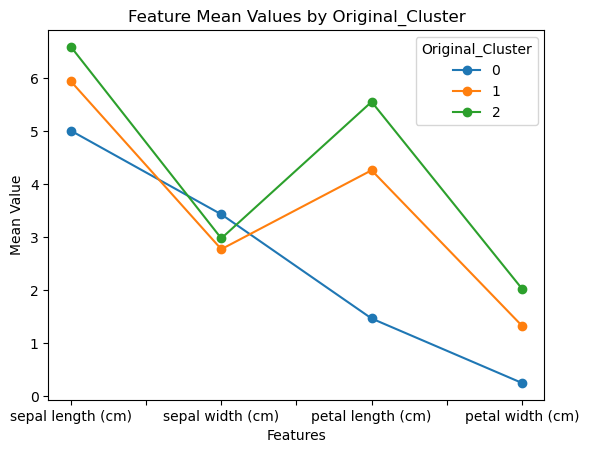

In [43]:
# 원래의 target 결과와 비교해서 보기
import pandas as pd
df=pd.DataFrame(X,columns=IR.feature_names)
df['Original_Cluster']=IR.target

# 클러스터 별로 평균값 계산하기
df.groupby('Original_Cluster').mean().T.plot(kind='line', marker='o')

# 그래프에 제목과 라벨 추가
plt.title('Feature Mean Values by Original_Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')

# 그래프 표시
plt.show()

In [44]:
IR.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
df=pd.DataFrame(X,columns=IR.feature_names)
df['Cluster']=labels # 새 칼럼 추가
df['Original_Cluster']=IR.target # 새 칼럼추가
# df.Cluster 열의 값 변환
cluster_mapping = {0: 2, 1: 1, 2: 0} # 매핑할 딕셔너리 정의
df['Cluster'].replace(cluster_mapping, inplace=True)

# 두 칼럼의 서로 같은 원소가 있는지 참, 거짓 판별
different_elements = df['Cluster'] == df['Original_Cluster']

# 정답율 계산
count_different_elements = different_elements.sum()
accuracy_percentage = count_different_elements / len(df.Cluster) * 100
# 소수 둘째 자리 까지만 출력하도록 포맷지정
formatted_accuracy = "{:.2f}".format(accuracy_percentage)
print(f"정답율: {formatted_accuracy}%")

정답율: 89.33%


In [47]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,Original_Cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
